In [13]:
import mysql.connector
from mysql.connector import Error


# Conectar a la base de datos
def conectar():
    try:
        conexion = mysql.connector.connect(
            host="localhost",
            user="root",
            password="123456",
            database="finaldiscreta"
        )

        if conexion.is_connected():
            print("Connected to the database successfully")
            return conexion

    except Error as err:
        print(f"Failed to connect to the database: {err}")
        return None


# Cerrar la conexión a la base de datos
def cerrar_conexion(conexion):
    if conexion and conexion.is_connected():
        conexion.close()
        print("Connection closed successfully")


# Obtener las amistades desde la base de datos
def obtener_amistades(conexion):
    try:
        cursor = conexion.cursor()
        cursor.execute("SELECT id_usuario1, id_usuario2 FROM amistades")
        amistades = cursor.fetchall()
        return amistades
    except Error as err:
        print(f"Error fetching amistades: {err}")
        return []
    finally:
        cursor.close()


# Función para obtener los nombres de los usuarios desde la base de datos
def obtener_nombres_usuarios(conexion):
    try:
        cursor = conexion.cursor()
        cursor.execute("SELECT id, nombre FROM Usuarios")
        usuarios = cursor.fetchall()
        # Crear un diccionario con id como clave y nombre como valor
        return {usuario[0]: usuario[1] for usuario in usuarios}
    except Error as err:
        print(f"Error fetching user names: {err}")
        return {}
    finally:
        cursor.close()


Connected to the database successfully


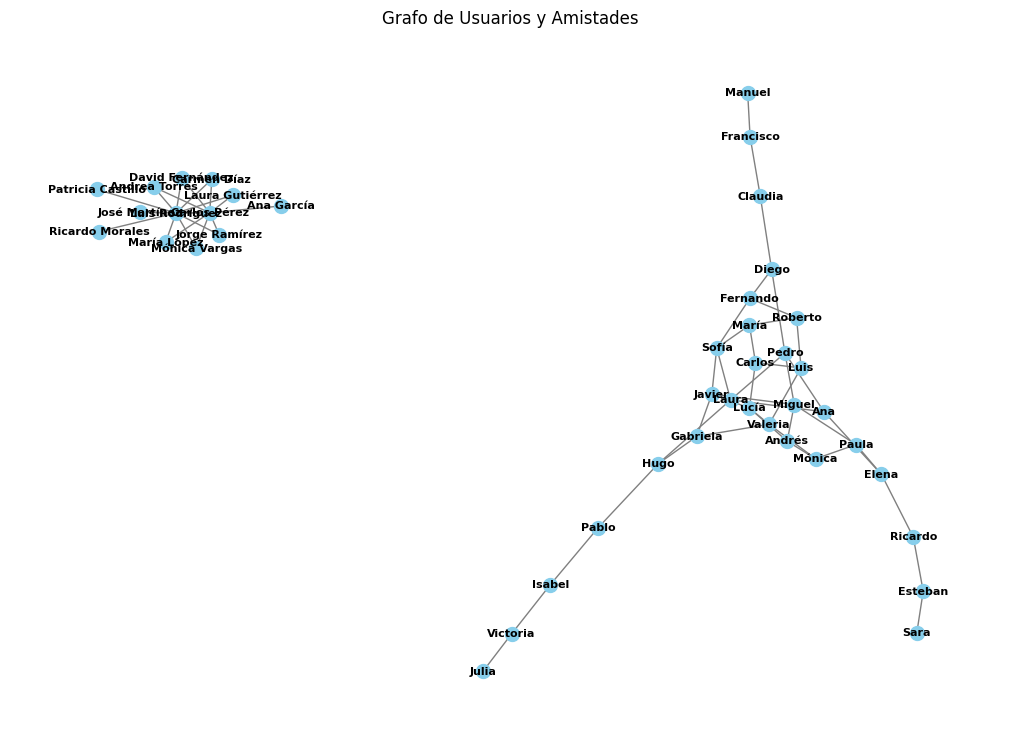

Connection closed successfully


In [20]:
import networkx as nx
import matplotlib.pyplot as plt
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion


def crear_grafo(amistades, conexion):
    # Obtener los nombres de los usuarios desde la base de datos
    usuarios = obtener_nombres_usuarios(conexion)

    G = nx.Graph()

    # Recorrer las amistades y agregar las relaciones al grafo
    for usuario1, usuario2 in amistades:
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            G.add_edge(nombre_usuario1, nombre_usuario2)

    # Visualizar el grafo con Matplotlib
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)  # Layout de los nodos
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=8, font_weight='bold',
            edge_color='gray')
    plt.title("Grafo de Usuarios y Amistades")
    plt.show()

    return G


def main():
    # Conectar a la base de datos
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            crear_grafo(amistades, conexion)

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


##PREGUNTA 1


In [21]:

def find_friend_groups(grafo):

    def dfs(nodo, visitado):
        stack = [nodo]
        while stack:
            nodoActual = stack.pop()
            for amigos in grafo[nodoActual]:
                if amigos not in visitado:
                    visitado.add(amigos)
                    stack.append(amigos)

    visitado = set()
    grupoAmigos = 0

    for nodo in grafo:
        if nodo not in visitado:
            visitado.add(nodo)
            dfs(nodo, visitado)
            grupoAmigos += 1

    return grupoAmigos



# Crear el grafo a partir de las amistades obtenidas
def crear_grafo(amistades, conexion):
    G = {}
    # Obtener los nombres de los usuarios desde la base de datos
    usuarios = obtener_nombres_usuarios(conexion)

    for usuario1, usuario2 in amistades:
        # Obtener los nombres de los usuarios
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            if nombre_usuario1 not in G:
                G[nombre_usuario1] = []
            if nombre_usuario2 not in G:
                G[nombre_usuario2] = []
            G[nombre_usuario1].append(nombre_usuario2)
            G[nombre_usuario2].append(nombre_usuario1)

    return G


def main():
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            grafo = crear_grafo(amistades, conexion)

            # Encontrar los grupos de amigos (componentes conexos)
            grupos = find_friend_groups(grafo)
            print(f"Número de grupos de amigos: {grupos}")

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


Connected to the database successfully
Número de grupos de amigos: 2
Connection closed successfully


##PREGUNTA 2

In [22]:
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion


# Función para recomendar amigos
def recomendar_amigos(amistades, conexion):
    # Obtener los nombres de los usuarios
    nombres_usuarios = obtener_nombres_usuarios(conexion)

    # Diccionario para almacenar las relaciones de amistad
    relaciones = {}

    # Construcción del grafo de relaciones de amistad
    for usuario1, usuario2 in amistades:
        # Obtener los nombres de los usuarios desde el diccionario
        nombre_usuario1 = nombres_usuarios.get(usuario1)
        nombre_usuario2 = nombres_usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            if nombre_usuario1 not in relaciones:
                relaciones[nombre_usuario1] = set()
            if nombre_usuario2 not in relaciones:
                relaciones[nombre_usuario2] = set()

            # Añadir la relación de amistad en ambos sentidos
            relaciones[nombre_usuario1].add(nombre_usuario2)
            relaciones[nombre_usuario2].add(nombre_usuario1)

    # Para cada usuario, encontramos posibles recomendaciones
    for usuario, amigos in relaciones.items():
        posibles_recomendaciones = set()

        # Iterar sobre los amigos del usuario
        for amigo in amigos:
            # Obtener los amigos del amigo (exceptuando al propio usuario y sus amigos)
            if amigo in relaciones:
                amigos_del_amigo = relaciones[amigo] - {usuario} - amigos
                posibles_recomendaciones.update(amigos_del_amigo)

        # Imprimir las recomendaciones para el usuario
        print(f"Usuario: {usuario}")
        if posibles_recomendaciones:
            print(f"  Recomendados: {', '.join(posibles_recomendaciones)}")
        else:
            print("  No hay recomendaciones de amigos.")
        print()


# Función principal
def main():
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Llamar a la función de recomendación de amigos
            recomendar_amigos(amistades, conexion)

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


Connected to the database successfully
Usuario: Carlos
  Recomendados: Sofía, Roberto, Valeria, Javier, Andrés

Usuario: Lucía
  Recomendados: Luis, Miguel, Sofía, Mónica, Gabriela, María

Usuario: María
  Recomendados: Luis, Lucía, Fernando, Laura, Javier

Usuario: Luis
  Recomendados: Lucía, Fernando, Mónica, Gabriela, María

Usuario: Andrés
  Recomendados: Paula, Carlos, Valeria, Javier, Pedro

Usuario: Javier
  Recomendados: Paula, Hugo, Valeria, Carlos, Fernando, Laura, Andrés, Pedro, María

Usuario: Valeria
  Recomendados: Carlos, Paula, Hugo, Roberto, Javier, Andrés

Usuario: Sofía
  Recomendados: Hugo, Roberto, Carlos, Lucía, Miguel, Diego, Gabriela, Ana, Pedro

Usuario: Roberto
  Recomendados: Carlos, Diego, Sofía, Valeria

Usuario: Miguel
  Recomendados: Sofía, Lucía, Laura, Diego, Mónica, Gabriela, Elena, Ana

Usuario: Mónica
  Recomendados: Luis, Miguel, Lucía, Gabriela, Elena

Usuario: Gabriela
  Recomendados: Luis, Lucía, Miguel, Laura, Pablo, Mónica, Sofía

Usuario: Laur

#PREGUNTA 3

In [23]:
# archivo: grafo.py

import networkx as nx
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion


def most_popular_friend(graph):
    # Inicializamos las variables para almacenar el usuario más popular
    max_friends = -1
    most_popular = None

    # Recorremos todos los nodos en el grafo
    for node in graph.nodes:
        # Obtenemos el grado del nodo (número de amigos)
        num_friends = graph.degree(node)

        # Si este nodo tiene más amigos que el actual más popular, lo actualizamos
        if num_friends > max_friends:
            max_friends = num_friends
            most_popular = node

    return most_popular, max_friends


def crear_grafo(amistades, conexion):
    usuarios = obtener_nombres_usuarios(conexion)
    G = nx.Graph()

    # Recorrer las amistades y agregar las relaciones al grafo
    for usuario1, usuario2 in amistades:
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            G.add_edge(nombre_usuario1, nombre_usuario2)

    return G


def main():
    # Conectar a la base de datos
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            grafo = crear_grafo(amistades, conexion)

            # Encontrar el usuario más popular
            user, friends_count = most_popular_friend(grafo)
            print(f"El usuario más popular es {user} con {friends_count} amigos.")

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


Connected to the database successfully
El usuario más popular es Luis Rodríguez con 11 amigos.
Connection closed successfully


#PREGUNTA 4

Connected to the database successfully


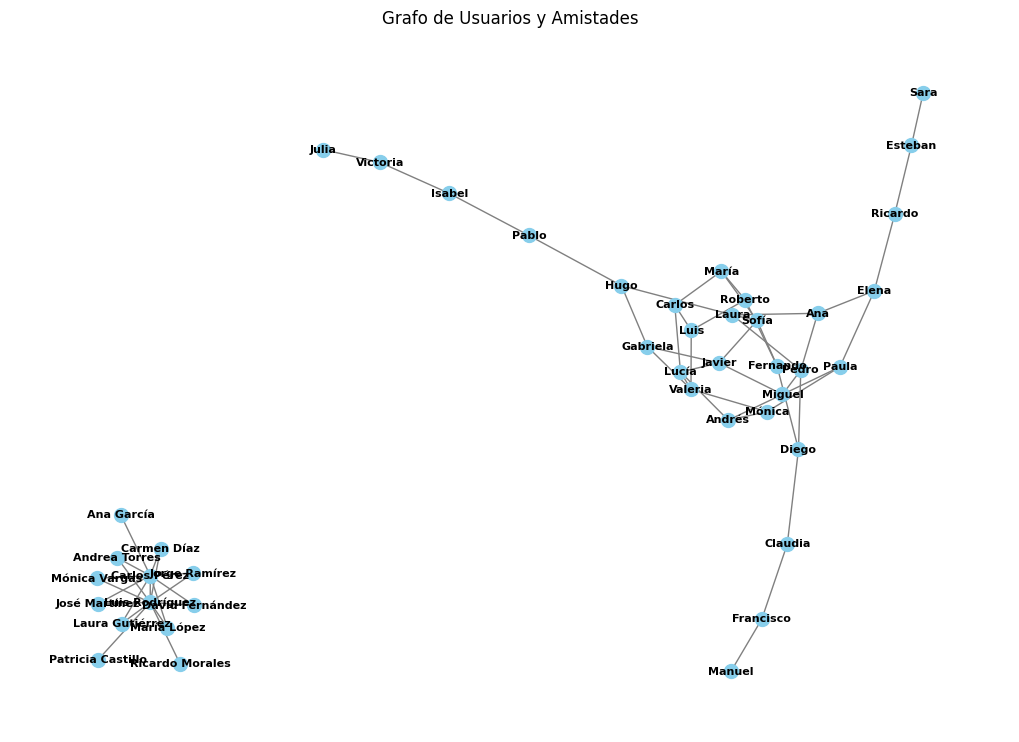

Camino más corto entre Carlos y Miguel: Carlos -> Lucía -> Andrés -> Miguel
Connection closed successfully


In [31]:
from collections import deque
import matplotlib.pyplot as plt
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion
import networkx as nx

# Función que implementa BFS para encontrar el camino más corto
from collections import deque

def shortest_path(grafo, persona1, persona2):
    # Si la persona inicial es igual a la persona destino, el camino es de longitud 0
    if persona1 == persona2:
        return [persona1]

    # Usamos una cola para realizar BFS
    cola = deque([(persona1, [persona1])]) #persona actual, camino recorrido hasta ahora 
    visitados = set()

    while cola: #continuará hasta que la cola esté vacía.
        nodo_actual, camino = cola.popleft()

        # Marcar el nodo como visitado
        visitados.add(nodo_actual)

        # Explorar los vecinos del nodo actual
        for vecino in grafo[nodo_actual]:
            if vecino not in visitados:
                # Si encontramos a la persona destino, devolvemos el camino actual
                if vecino == persona2:
                    return camino + [vecino]

                # Agregar el vecino a la cola con el camino actualizado
                cola.append((vecino, camino + [vecino]))

    # Si no se encuentra un camino, devolver None
    return None

# Crear el grafo de amistades
def crear_grafo(amistades, conexion):
    # Obtener los nombres de los usuarios desde la base de datos
    usuarios = obtener_nombres_usuarios(conexion)

    G = nx.Graph()

    # Recorrer las amistades y agregar las relaciones al grafo
    for usuario1, usuario2 in amistades:
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            G.add_edge(nombre_usuario1, nombre_usuario2)

    # Visualizar el grafo con Matplotlib
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)  # Layout de los nodos
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, font_size=8, font_weight='bold',
            edge_color='gray')
    plt.title("Grafo de Usuarios y Amistades")
    plt.show()

    return G

# Probar la búsqueda del camino más corto entre dos usuarios
def probar_camino_mas_corto(graph, person1, person2):
    camino = shortest_path(graph, person1, person2)
    if camino:
        print(f"Camino más corto entre {person1} y {person2}: {' -> '.join(camino)}")
    else:
        print(f"No existe un camino entre {person1} y {person2}")

# Función principal
def main():
    # Conectar a la base de datos
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            G = crear_grafo(amistades, conexion)

            # Probar la búsqueda del camino más corto entre dos personas
            # Cambia los valores de person1 y person2 para probar con usuarios específicos
            person1 = "Carlos"  # Reemplaza con un nombre de usuario válido
            person2 = "Miguel"  # Reemplaza con un nombre de usuario válido
            probar_camino_mas_corto(G, person1, person2)

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")

if __name__ == "__main__":
    main()


#PREGUNTA 5

Connected to the database successfully


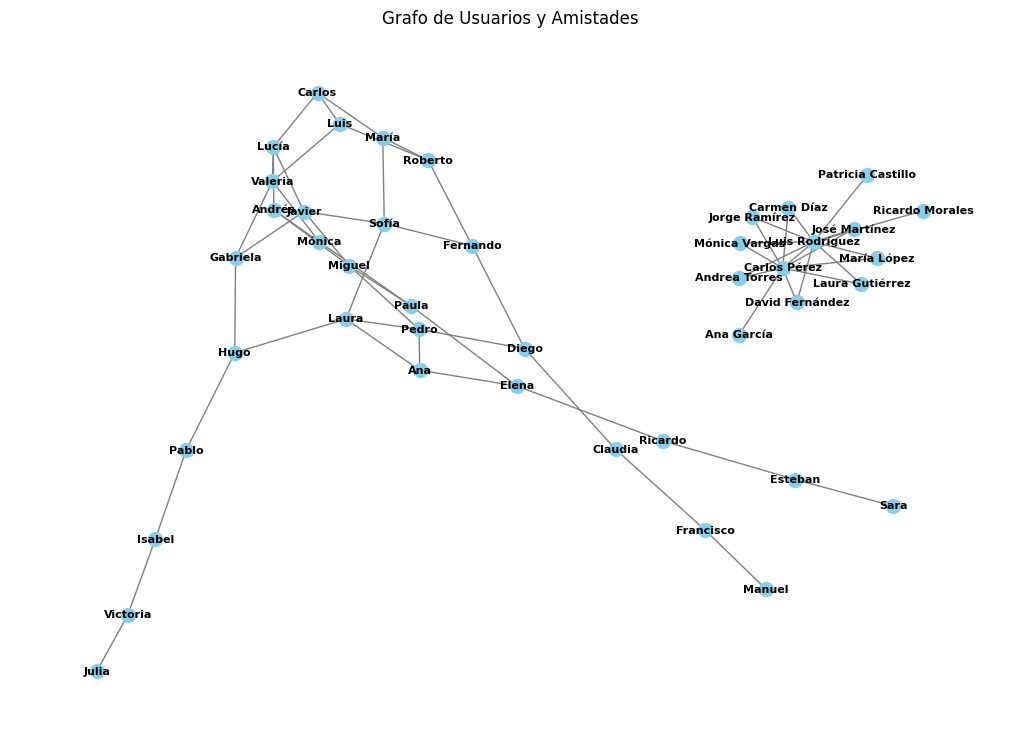

¿La red tiene ciclos?: True
Connection closed successfully


In [32]:
def has_cycle(grafo):
    # Función auxiliar para realizar DFS
    def dfs(nodo, padre, visitados, longitud_camino):
        # Marcar el nodo como visitado
        visitados.add(nodo)

        # Explorar los vecinos del nodo actual
        for vecino in grafo[nodo]:
            # Si el vecino no ha sido visitado, continuamos con DFS
            if vecino not in visitados:
                # Aumentamos la longitud del camino
                if dfs(vecino, nodo, visitados, longitud_camino + 1):
                    return True
            # Si el vecino ya fue visitado y no es el padre del nodo actual
            # y la longitud del camino es al menos 3, hemos encontrado un ciclo
            elif vecino != padre and longitud_camino >= 3:
                return True

        # No se encontró ciclo en esta rama
        return False

    # Conjunto para almacenar los nodos visitados
    visitados = set()

    # Iniciar DFS desde cada nodo no visitado
    for nodo in grafo:
        if nodo not in visitados:
            if dfs(nodo, None, visitados, 1):
                return True

    # Si no se encuentra ningún ciclo, devolver False
    return False

def main():
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            grafo = crear_grafo(amistades, conexion)
            # Detectar si hay ciclos en la red social
            tiene_ciclo = has_cycle(grafo)
            print(f"¿La red tiene ciclos?: {tiene_ciclo}")

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()